In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import warnings
%matplotlib inline

In [3]:
raw_df = pd.read_csv('../../data/suicide.csv')
raw_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
raw_df.rename(columns={' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace=True)
raw_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
# Drop na values in HDI
raw_df.loc[raw_df['HDI for year'].isna(), ['country', 'year']].drop_duplicates()

,country,year
0,Albania,1987
12,Albania,1988
24,Albania,1989
36,Albania,1992
48,Albania,1993
...,...,...
27688,Uzbekistan,2001
27700,Uzbekistan,2002
27712,Uzbekistan,2003
27724,Uzbekistan,2004


In [6]:
# Still missing a lot of HDI data
# Decided to drop column so as to not skew results due to missing information in some rows
raw_df.drop(["HDI for year"], axis=1)

# Also drop country-year since it is already given in the year column
raw_df.drop(columns=['country-year'], inplace=True)
raw_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
import geopandas

In [8]:
# Load the map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [9]:
# Group the data by country and find the sum of suicides number and population
suicide_by_country_df = raw_df.groupby('country')[['suicides_no', 'population']].sum().reset_index()

# Calculate suicides/100k pop
suicide_by_country_df['suicides/100k pop'] = 100000 * suicide_by_country_df['suicides_no'] / suicide_by_country_df['population']

# Sort the rows by suicides/100k pop from highest to lowest
suicide_by_country_df.sort_values(by='suicides/100k pop', ascending=False, inplace=True)
suicide_by_country_df.head()

,country,suicides_no,population,suicides/100k pop
52,Lithuania,28039,68085210,41.182219
75,Russian Federation,1209742,3690802620,32.777207
87,Sri Lanka,55641,182525626,30.483939
11,Belarus,59892,197372292,30.344685
40,Hungary,73891,248644256,29.717558


In [10]:
# Modify country name due to a difference in two dataframes
country_match = {'Russia': 'Russian Federation', 'United States of America': 'United States', 'South Korea': 'Republic of Korea', 
                 'Bosnia and Herz.': 'Bosnia and Herzegovina'}
world['name'].replace(country_match, inplace=True)

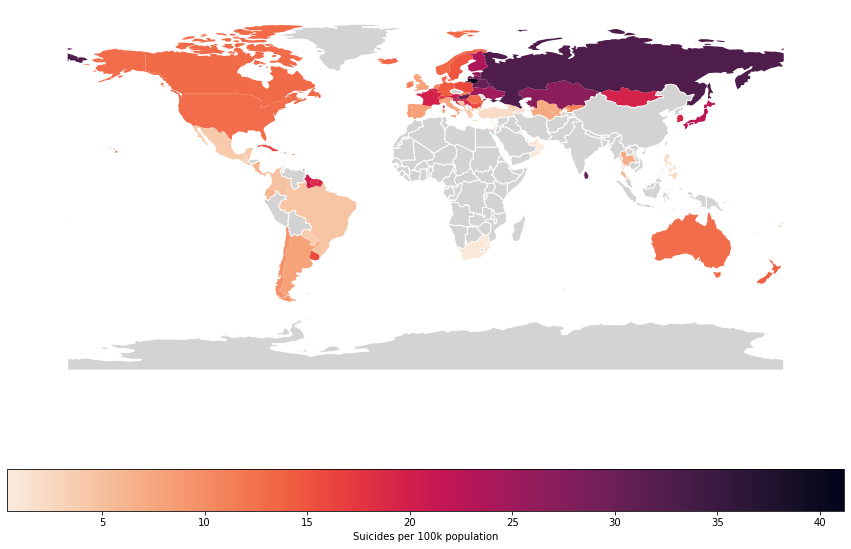

In [11]:
# Merge the two dataframes together
table = world.merge(suicide_by_country_df, how='left', left_on=['name'], right_on=['country'])

# Create the map
ax = table.plot(column='suicides/100k pop',
           figsize=(15, 10),
           cmap='rocket_r',
           legend=True, 
           legend_kwds={'label': 'Suicides per 100k population',
                        'orientation': 'horizontal'},
           missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "label": "Missing values",});
ax.set_axis_off();

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

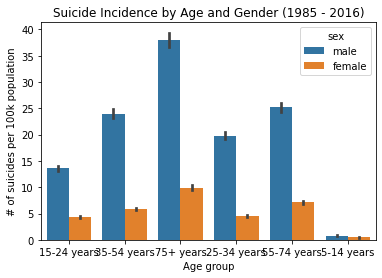

In [12]:
# Create a barplot 
sns.barplot(data=raw_df, x='age', y='suicides/100k pop', hue='sex')
plt.xlabel('Age group')
plt.ylabel('# of suicides per 100k population')
plt.title('Suicide Incidence by Age and Gender (1985 - 2016)');

<AxesSubplot:xlabel='suicides/100k pop', ylabel='Density'>

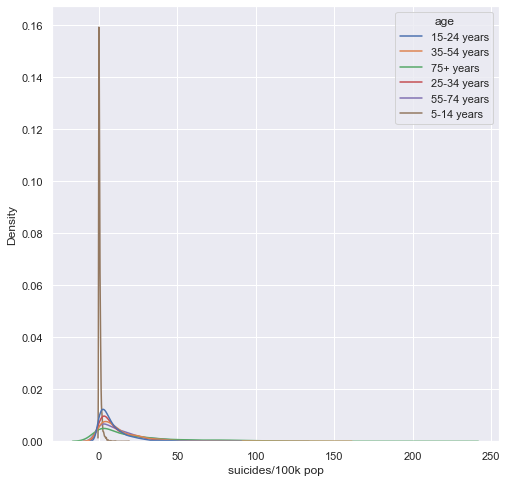

In [44]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.kdeplot(data=raw_df, x="suicides/100k pop", hue="age")

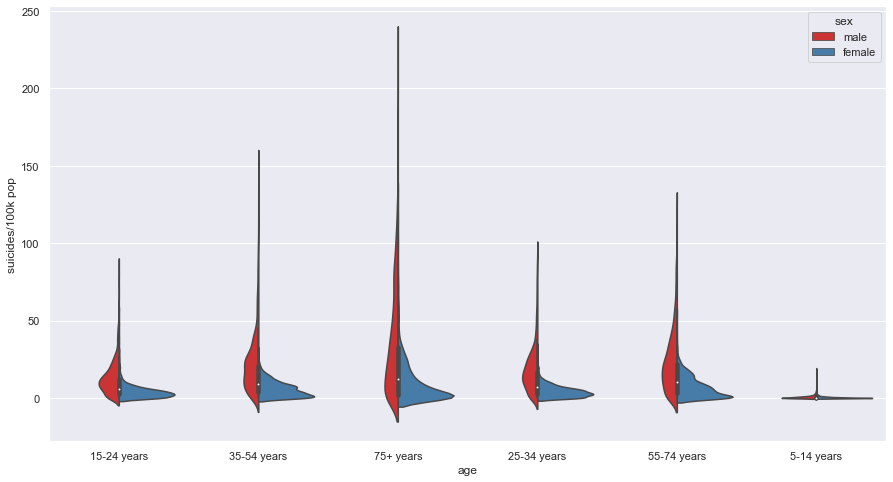

In [57]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=raw_df, x='age', y='suicides/100k pop', hue='sex', split=True, palette='Set1');

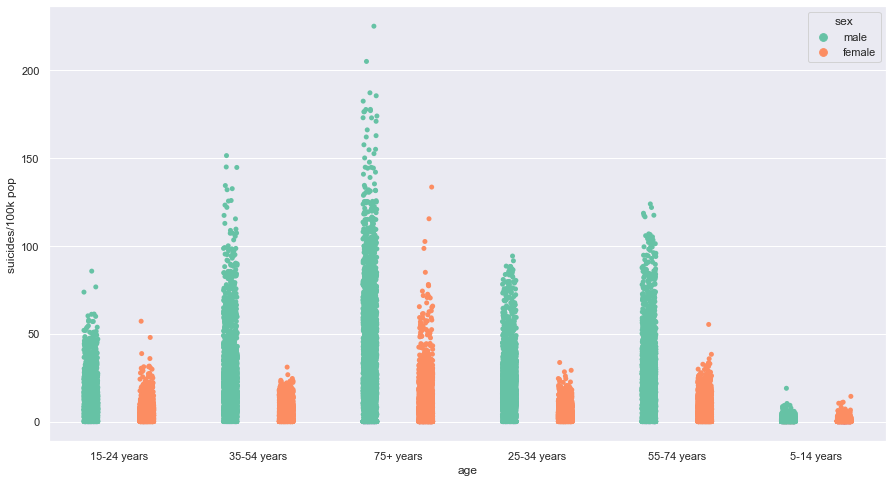

In [47]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=raw_df, x='age', y='suicides/100k pop', hue='sex', palette="Set2", dodge=True);